In [71]:
# Import Lib
import os
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
os.chdir(r"C:\Users\Madusha.MahaGamage\Downloads\Fire Dataset") # define default work diractory


In [72]:
# Read data (Lab_5_data)
file = r'C:\Users\Madusha.MahaGamage\Downloads\Fire Dataset\FireDataset_Modify3.xlsx'
df = pd.read_excel(file,sheet_name = 'Sheet1')
df


,fire,temperatureMean,ndviMean,slope,elevation,Dis_Water,Dis_Road,population,windspeed,evaporation,precipitation
0,1,11.939016,0.363570,1.836366,925.020725,4617.726632,0.000000,1.586014,3.535956,-1.338031e-05,0.000000e+00
1,2,14.248696,0.399909,4.616538,1051.219588,0.000000,0.000000,4.126224,3.312377,-1.959500e-05,0.000000e+00
2,1,17.975698,0.386804,6.812360,365.555000,7467.239944,0.000000,10.950546,1.298973,2.020970e-07,0.000000e+00
3,2,18.192801,0.566838,4.445234,316.000806,0.000000,0.000000,28.405514,1.802869,-6.740119e-07,-8.373320e-09
4,1,18.382154,0.033163,5.053475,653.687157,0.000000,0.000000,22.968871,1.482039,-2.058484e-06,2.344978e-05
...,...,...,...,...,...,...,...,...,...,...,...
464,1,40.250000,0.194948,8.101465,239.181818,6312.575325,1349.570490,35.152199,1.117201,-1.618639e-06,2.801418e-06
465,1,43.563333,0.329534,7.980463,801.628713,915.654127,1757.333860,0.205452,1.757883,-5.995307e-06,0.000000e+00
466,1,39.730000,0.181431,9.186076,796.000000,5204.693347,1823.039050,1.215015,1.920165,-8.521602e-07,0.000000e+00
467,1,32.746552,0.308251,7.638832,240.000000,7987.452891,1939.783719,64.416332,4.238600,-2.703629e-06,0.000000e+00


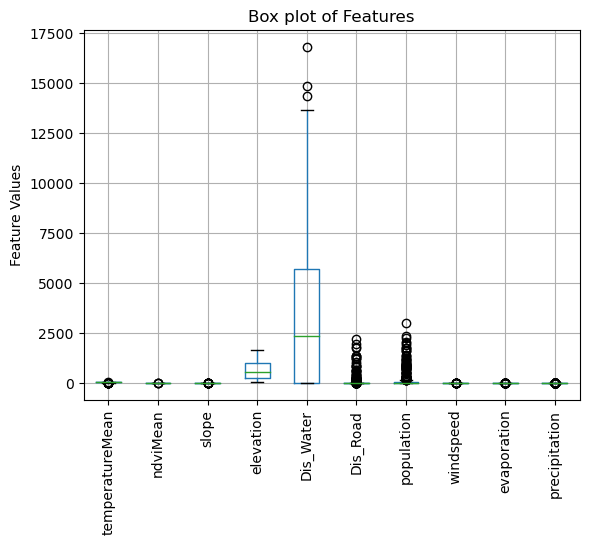

In [73]:
cols_to_plot = ['temperatureMean', 'ndviMean', 'slope','elevation','Dis_Water','Dis_Road','population','windspeed','evaporation','precipitation']
boxplot = df[cols_to_plot].boxplot()
# Customize the grid properties
#plt.grid(axis='y', alpha=0.5, linewidth=2)

# Set the rotation angle of the x-axis labels
plt.xticks(rotation=90)

# Customize the appearance of the box plot, such as the title and axis labels
plt.title('Box plot of Features')
plt.ylabel('Feature Values')
plt.show()

In [74]:
#%% Split samples into training and testing sets
test_size = 0.3
class_number = 2 # total class numbers
random_state = 0  # radom state used for traning and testing sample spliting

X_train = []
y_train = [] 
X_test = []    
y_test = []

for i in range(class_number):
    i+=1
    X = df[df['fire']==i]
    print(i)
    y = X['fire'].to_frame()
    X = X.iloc[:,1:]
    
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train.append(X_train_class)
    X_test.append(X_test_class)
    y_train.append(y_train_class)
    y_test.append(y_test_class)
    
    print(type(X_train_class))

# Merge multiple dataframes      
X_train = pd.concat(X_train)
y_train = pd.concat(y_train)
X_test = pd.concat(X_test)    
y_test = pd.concat(y_test)

# Convert dataframes numpy arraries
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()   
y_test = y_test.to_numpy()

# change the shape of y from (n_samples,1)  to (n_samples,)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)



1
<class 'pandas.core.frame.DataFrame'>
2
<class 'pandas.core.frame.DataFrame'>


In [75]:
# Import the module
from sklearn.preprocessing import StandardScaler


# Define the scaling object
scaler = StandardScaler()

# Fit the scaler to X
scaler.fit(X_train)

# Transform the original X to scaled/normalized X
X_train = scaler.transform(X_train)

print(X_train)
print(X_train.shape)



[[-2.50010787 -2.58925583  0.20315611 ... -0.72100514  0.65232944
  -0.10825913]
 [ 0.96076186 -0.56338957 -0.54436218 ...  1.49550828  0.42875909
  -0.16643421]
 [ 0.00636034 -0.23685632  0.93119796 ...  0.29796266  0.47256342
  -0.16643421]
 ...
 [ 0.18246839  1.14300772 -0.27114235 ... -1.13065777  0.516859
  -0.16636137]
 [-0.62013852  2.9836868   0.24577886 ... -0.02089606  0.21707016
  -0.14096785]
 [ 0.75066521  0.27897557  0.0938155  ... -0.7610675   0.16726598
  -0.16643421]]
(328, 10)


In [76]:
# Import the module
from sklearn.preprocessing import StandardScaler


# Define the scaling object
scaler = StandardScaler()

# Fit the scaler to X
scaler.fit(X_test)

# Transform the original X to scaled/normalized X
X_test = scaler.transform(X_test)

print(X_test)
print(X_test.shape)



[[ 0.43382365 -0.47150808 -1.06834545 ...  0.35658321 -1.9433019
  -0.25650309]
 [ 0.92338596 -0.38923547 -1.24771094 ... -0.377946    0.45522461
  -0.25650309]
 [ 0.15447153 -0.56698093 -0.81787139 ... -0.55928274  0.27920943
  -0.11661539]
 ...
 [-0.53793711  1.42184423  0.33161424 ... -0.43931916  0.1296426
  -0.25437164]
 [-0.69494897  0.50515898 -0.37880808 ... -0.85583636  0.35885454
  -0.25650309]
 [-0.45406557  2.09175303 -0.20926234 ...  0.05584647  0.51432396
  -0.25650309]]
(141, 10)


### 1. Logistic Regression

In [77]:
# Import the  algorithm from sklearn lib
from sklearn.linear_model import LogisticRegression

In [78]:
# Define the model and train the model
model = LogisticRegression()
model = model.fit(X_train,y_train)

Mode Testing overall accuracy (OA):  0.801
Model Testing kappa:  0.605
Model Training f-score:  0.801
[[55 19]
 [ 9 58]]


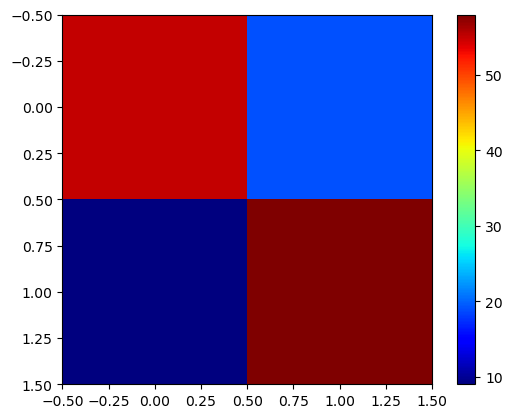

In [79]:
# Import model evalutoin metrics, and calculate & print out overall accuray, kappa and f-score; as well as print out and vilulize confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

# Evaluate and visualize the performance of the model at the Testing phase
y_pred_test = model.predict(X_test)

print('Mode Testing overall accuracy (OA): % .3f' % accuracy_score(y_test, y_pred_test))
print('Model Testing kappa: % .3f' % cohen_kappa_score(y_test, y_pred_test))
print('Model Training f-score: % .3f' % f1_score(y_test, y_pred_test, average = 'weighted'))
cm_testing = confusion_matrix(y_test, y_pred_test)
print(cm_testing)
plt.imshow(cm_testing,cmap = 'jet')
plt.colorbar()
plt.show()


{'class 0': {'precision': 0.859375, 'recall': 0.7432432432432432, 'f1-score': 0.7971014492753623, 'support': 74}, 'class 1': {'precision': 0.7532467532467533, 'recall': 0.8656716417910447, 'f1-score': 0.8055555555555556, 'support': 67}, 'accuracy': 0.8014184397163121, 'macro avg': {'precision': 0.8063108766233766, 'recall': 0.804457442517144, 'f1-score': 0.8013285024154589, 'support': 141}, 'weighted avg': {'precision': 0.8089452657271806, 'recall': 0.8014184397163121, 'f1-score': 0.8011186487134684, 'support': 141}}


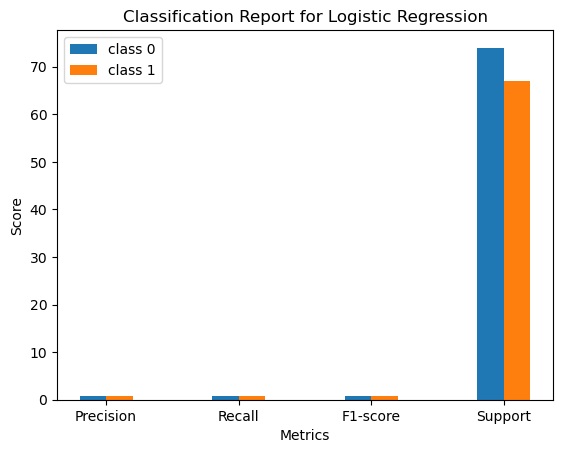

In [80]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1'] # class labels
report = classification_report(y_test, y_pred_test, target_names=target_names,  output_dict=True)
print(report)

# Extract the precision, recall, f1-score, and support values for each class from the classification report dictionary.
precision = []
recall = []
f1_score = []
support = []

for target in target_names:
    precision.append(report[target]['precision'])
    recall.append(report[target]['recall'])
    f1_score.append(report[target]['f1-score'])
    support.append(report[target]['support'])
    
# Define the labels for the x-axis of the bar chart.
x_labels = ['Precision', 'Recall', 'F1-score', 'Support']
# Create a numpy array with the values for each metric and each class.
data = np.array([precision, recall, f1_score, support])
# Define the colors for the bars in the bar chart.
colors = ['#1f77b4', '#ff7f0e']
# Define the width of the bars in the bar chart.
bar_width = 0.2
# Create a figure and axis object using Matplotlib.
fig, ax = plt.subplots()
# Loop through each class and create a set of bars for each metric.
for i in range(len(target_names)):
    x = np.arange(len(x_labels)) + i * bar_width
    ax.bar(x, data[:,i], width=bar_width, color=colors[i], label=target_names[i])
# Add labels, legends, and title to the chart.
ax.set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Logistic Regression')
ax.legend()
# Show the chart
plt.show()

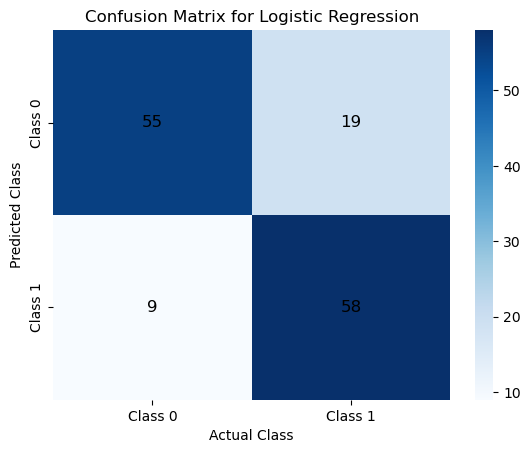

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap object and assign it to 'ax'
ax = sns.heatmap(cm_testing, annot=True, cmap='Blues')

# Set xlabel, ylabel, and title
ax.set_xlabel('Actual Class')
ax.set_ylabel('Predicted Class')
ax.set_title('Confusion Matrix for Logistic Regression')

ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Set font size and color for annotations
plt.setp(ax.texts, fontsize=12, color='black')

# Show plot
plt.show()

In [82]:
# Print the feature importance
for i, coef in enumerate(model.coef_[0]):
    print(f'Feature {i}: {coef:.3f}')

Feature 0: -0.009
Feature 1: 0.248
Feature 2: -0.306
Feature 3: 0.354
Feature 4: -1.150
Feature 5: -2.159
Feature 6: 0.643
Feature 7: 0.054
Feature 8: 0.079
Feature 9: 0.169


### 2. Decision Tree (DT)

In [83]:
# Import the  algorithm from sklearn lib

from sklearn.tree import DecisionTreeClassifier

In [84]:
# Define the model and train the model

model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

Mode Testing overall accuracy (OA):  0.730
Mode Testing kappa:  0.461
Mode Testing f1_score:  0.731
[[53 21]
 [17 50]]


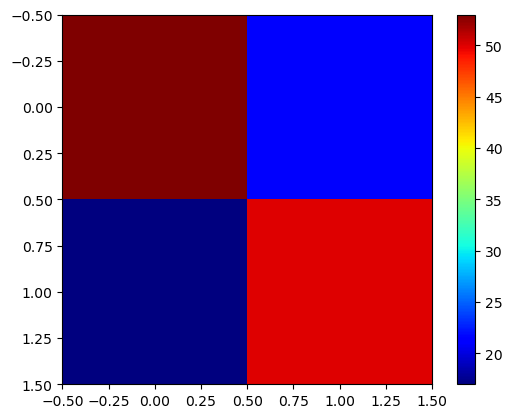

In [85]:
# Import model evalutoin metrics, and calculate & print out overall accuray, kappa and f-score; as well as print out and 
# vilulize confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

# Evaluate the performance of the model at the testing phase:
y_pred_test = model.predict(X_test)

print ('Mode Testing overall accuracy (OA): %  .3f' % accuracy_score(y_test, y_pred_test))
print ('Mode Testing kappa: %  .3f' % cohen_kappa_score(y_test, y_pred_test))
print ('Mode Testing f1_score: %  .3f' % f1_score(y_test,y_pred_test, average = 'weighted'))

cm_testing = confusion_matrix(y_test, y_pred_test)
print (cm_testing) # Print the confusuion matrix
plt.imshow(cm_testing, cmap = 'jet') # Visualize the confusion matrix
plt.colorbar()
plt.show()


{'class 0': {'precision': 0.7571428571428571, 'recall': 0.7162162162162162, 'f1-score': 0.736111111111111, 'support': 74}, 'class 1': {'precision': 0.704225352112676, 'recall': 0.746268656716418, 'f1-score': 0.7246376811594204, 'support': 67}, 'accuracy': 0.7304964539007093, 'macro avg': {'precision': 0.7306841046277666, 'recall': 0.731242436466317, 'f1-score': 0.7303743961352658, 'support': 141}, 'weighted avg': {'precision': 0.7319976597171682, 'recall': 0.7304964539007093, 'f1-score': 0.7306591975879673, 'support': 141}}


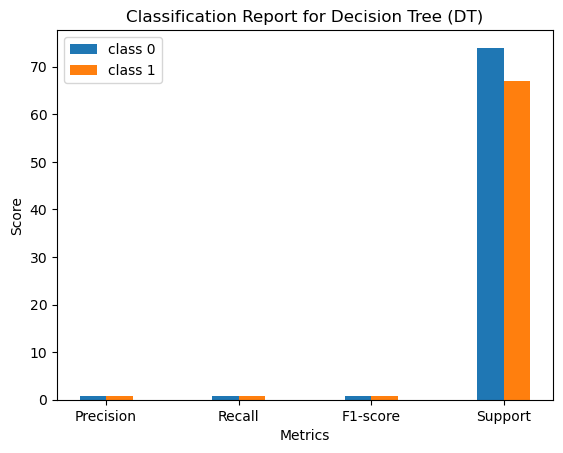

In [86]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1'] # class labels
report = classification_report(y_test, y_pred_test, target_names=target_names,  output_dict=True)
print(report)

# Extract the precision, recall, f1-score, and support values for each class from the classification report dictionary.
precision = []
recall = []
f1_score = []
support = []

for target in target_names:
    precision.append(report[target]['precision'])
    recall.append(report[target]['recall'])
    f1_score.append(report[target]['f1-score'])
    support.append(report[target]['support'])
    
# Define the labels for the x-axis of the bar chart.
x_labels = ['Precision', 'Recall', 'F1-score', 'Support']
# Create a numpy array with the values for each metric and each class.
data = np.array([precision, recall, f1_score, support])
# Define the colors for the bars in the bar chart.
colors = ['#1f77b4', '#ff7f0e']
# Define the width of the bars in the bar chart.
bar_width = 0.2
# Create a figure and axis object using Matplotlib.
fig, ax = plt.subplots()
# Loop through each class and create a set of bars for each metric.
for i in range(len(target_names)):
    x = np.arange(len(x_labels)) + i * bar_width
    ax.bar(x, data[:,i], width=bar_width, color=colors[i], label=target_names[i])
# Add labels, legends, and title to the chart.
ax.set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Decision Tree (DT)')
ax.legend()
# Show the chart
plt.show()

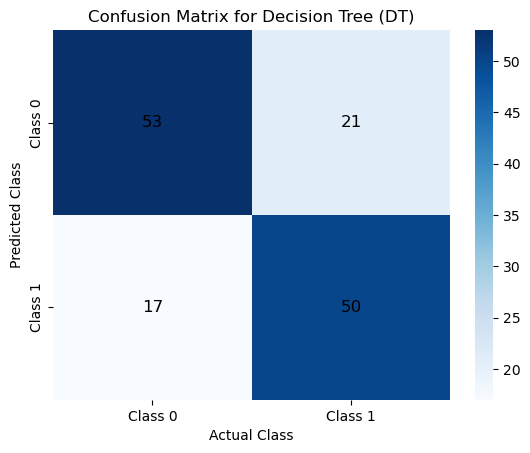

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap object and assign it to 'ax'
ax = sns.heatmap(cm_testing, annot=True, cmap='Blues')

# Set xlabel, ylabel, and title
ax.set_xlabel('Actual Class')
ax.set_ylabel('Predicted Class')
ax.set_title('Confusion Matrix for Decision Tree (DT)')

ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Set font size and color for annotations
plt.setp(ax.texts, fontsize=12, color='black')

# Show plot
plt.show()

In [88]:
for i, importance in enumerate(model.feature_importances_):
    print(f'Feature {i}: {importance:.3f}')

Feature 0: 0.064
Feature 1: 0.134
Feature 2: 0.054
Feature 3: 0.057
Feature 4: 0.378
Feature 5: 0.123
Feature 6: 0.084
Feature 7: 0.044
Feature 8: 0.056
Feature 9: 0.006


### 3. Radom Forest (RF)

In [89]:
# Import the  algorithm from sklearn lib

from sklearn.ensemble import RandomForestClassifier

In [90]:
# Define the model and train the model

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

Mode Testing overall accuracy (OA):  0.766
Mode Testing kappa:  0.525
Mode Testing f1_score:  0.761
[[66  8]
 [25 42]]


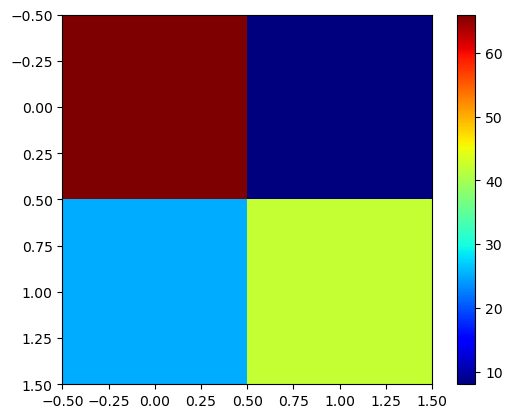

In [91]:
# Import model evalutoin metrics, and calculate & print out overall accuray, kappa and f-score; as well as print out and 
# vilulize confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

# Evaluate the performance of the model at the testing phase:
y_pred_test = model.predict(X_test)

print ('Mode Testing overall accuracy (OA): %  .3f' % accuracy_score(y_test, y_pred_test))
print ('Mode Testing kappa: %  .3f' % cohen_kappa_score(y_test, y_pred_test))
print ('Mode Testing f1_score: %  .3f' % f1_score(y_test,y_pred_test, average = 'weighted'))

cm_testing = confusion_matrix(y_test, y_pred_test)
print (cm_testing) # Print the confusuion matrix
plt.imshow(cm_testing, cmap = 'jet') # Visualize the confusion matrix
plt.colorbar()
plt.show()


{'class 0': {'precision': 0.7252747252747253, 'recall': 0.8918918918918919, 'f1-score': 0.8, 'support': 74}, 'class 1': {'precision': 0.84, 'recall': 0.6268656716417911, 'f1-score': 0.7179487179487181, 'support': 67}, 'accuracy': 0.7659574468085106, 'macro avg': {'precision': 0.7826373626373626, 'recall': 0.7593787817668415, 'f1-score': 0.758974358974359, 'support': 141}, 'weighted avg': {'precision': 0.7797895721299977, 'recall': 0.7659574468085106, 'f1-score': 0.7610110929259866, 'support': 141}}


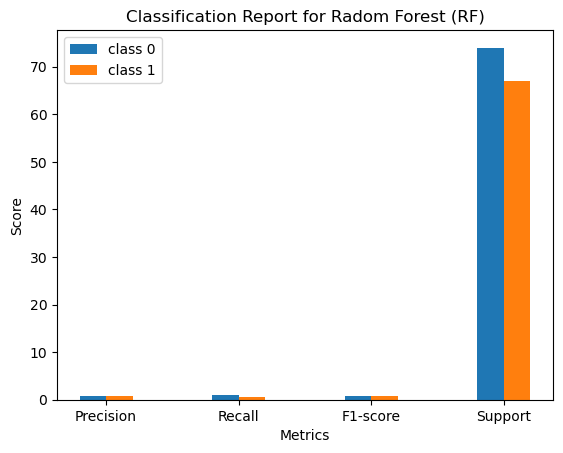

In [92]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1'] # class labels
report = classification_report(y_test, y_pred_test, target_names=target_names,  output_dict=True)
print(report)

# Extract the precision, recall, f1-score, and support values for each class from the classification report dictionary.
precision = []
recall = []
f1_score = []
support = []

for target in target_names:
    precision.append(report[target]['precision'])
    recall.append(report[target]['recall'])
    f1_score.append(report[target]['f1-score'])
    support.append(report[target]['support'])
    
# Define the labels for the x-axis of the bar chart.
x_labels = ['Precision', 'Recall', 'F1-score', 'Support']
# Create a numpy array with the values for each metric and each class.
data = np.array([precision, recall, f1_score, support])
# Define the colors for the bars in the bar chart.
colors = ['#1f77b4', '#ff7f0e']
# Define the width of the bars in the bar chart.
bar_width = 0.2
# Create a figure and axis object using Matplotlib.
fig, ax = plt.subplots()
# Loop through each class and create a set of bars for each metric.
for i in range(len(target_names)):
    x = np.arange(len(x_labels)) + i * bar_width
    ax.bar(x, data[:,i], width=bar_width, color=colors[i], label=target_names[i])
# Add labels, legends, and title to the chart.
ax.set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Radom Forest (RF)')
ax.legend()
# Show the chart
plt.show()

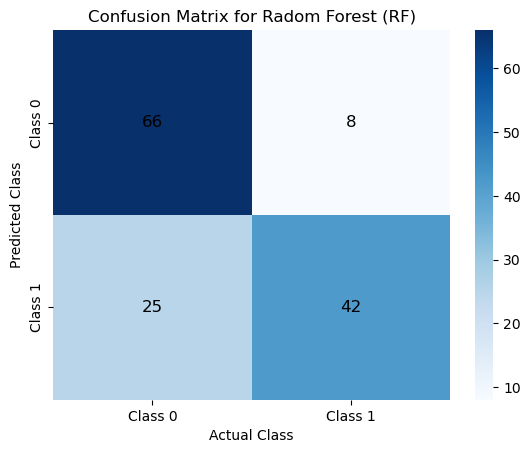

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap object and assign it to 'ax'
ax = sns.heatmap(cm_testing, annot=True, cmap='Blues')

# Set xlabel, ylabel, and title
ax.set_xlabel('Actual Class')
ax.set_ylabel('Predicted Class')
ax.set_title('Confusion Matrix for Radom Forest (RF)')

ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Set font size and color for annotations
plt.setp(ax.texts, fontsize=12, color='black')

# Show plot
plt.show()

In [94]:
# Extract feature importance scores
importance = model.feature_importances_

# Print feature importance scores
for i,v in enumerate(importance):
    print(f'Feature {i}: {v:.3f}')
    
from sklearn.inspection import permutation_importance

# Calculate permutation importance scores
result = permutation_importance(model, X_train,y_train, n_repeats=10, random_state=0)

# Print feature importance scores
for i,v in enumerate(result.importances_mean):
    print(f'Feature {i}: {v:.3f}')
    

Feature 0: 0.047
Feature 1: 0.090
Feature 2: 0.138
Feature 3: 0.083
Feature 4: 0.272
Feature 5: 0.133
Feature 6: 0.122
Feature 7: 0.048
Feature 8: 0.051
Feature 9: 0.015
Feature 0: 0.006
Feature 1: 0.034
Feature 2: 0.096
Feature 3: 0.035
Feature 4: 0.148
Feature 5: 0.135
Feature 6: 0.056
Feature 7: 0.010
Feature 8: 0.016
Feature 9: 0.000


### SVM

Mode Testing overall accuracy (OA):  0.794
Mode Testing kappa:  0.591
Mode Testing f1_score:  0.794
[[54 20]
 [ 9 58]]


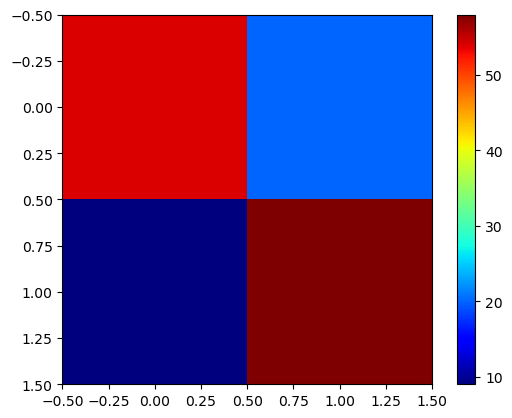

In [98]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Create an SVC model
model = SVC(kernel='linear')

# Train the model using the training data
model.fit(X_train, y_train)


# Import model evalutoin metrics, and calculate & print out overall accuray, kappa and f-score; as well as print out and 
# vilulize confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score

# Evaluate the performance of the model at the testing phase:
y_pred_test = model.predict(X_test)

print ('Mode Testing overall accuracy (OA): %  .3f' % accuracy_score(y_test, y_pred_test))
print ('Mode Testing kappa: %  .3f' % cohen_kappa_score(y_test, y_pred_test))
print ('Mode Testing f1_score: %  .3f' % f1_score(y_test,y_pred_test, average = 'weighted'))

cm_testing = confusion_matrix(y_test, y_pred_test)
print (cm_testing) # Print the confusuion matrix
plt.imshow(cm_testing, cmap = 'jet') # Visualize the confusion matrix
plt.colorbar()
plt.show()


{'class 0': {'precision': 0.8571428571428571, 'recall': 0.7297297297297297, 'f1-score': 0.7883211678832117, 'support': 74}, 'class 1': {'precision': 0.7435897435897436, 'recall': 0.8656716417910447, 'f1-score': 0.8, 'support': 67}, 'accuracy': 0.7943262411347518, 'macro avg': {'precision': 0.8003663003663004, 'recall': 0.7977006857603872, 'f1-score': 0.7941605839416059, 'support': 141}, 'weighted avg': {'precision': 0.8031849946743563, 'recall': 0.7943262411347518, 'f1-score': 0.7938706838536006, 'support': 141}}


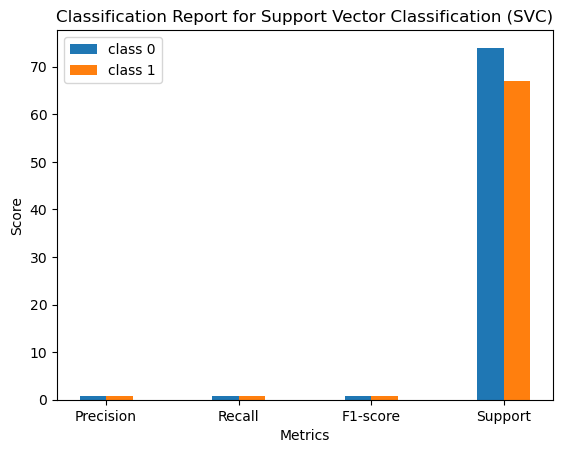

In [99]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1'] # class labels
report = classification_report(y_test, y_pred_test, target_names=target_names,  output_dict=True)
print(report)

# Extract the precision, recall, f1-score, and support values for each class from the classification report dictionary.
precision = []
recall = []
f1_score = []
support = []

for target in target_names:
    precision.append(report[target]['precision'])
    recall.append(report[target]['recall'])
    f1_score.append(report[target]['f1-score'])
    support.append(report[target]['support'])
    
# Define the labels for the x-axis of the bar chart.
x_labels = ['Precision', 'Recall', 'F1-score', 'Support']
# Create a numpy array with the values for each metric and each class.
data = np.array([precision, recall, f1_score, support])
# Define the colors for the bars in the bar chart.
colors = ['#1f77b4', '#ff7f0e']
# Define the width of the bars in the bar chart.
bar_width = 0.2
# Create a figure and axis object using Matplotlib.
fig, ax = plt.subplots()
# Loop through each class and create a set of bars for each metric.
for i in range(len(target_names)):
    x = np.arange(len(x_labels)) + i * bar_width
    ax.bar(x, data[:,i], width=bar_width, color=colors[i], label=target_names[i])
# Add labels, legends, and title to the chart.
ax.set_xticks(np.arange(len(x_labels)) + bar_width / 2)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Support Vector Classification (SVC)')
ax.legend()
# Show the chart
plt.show()

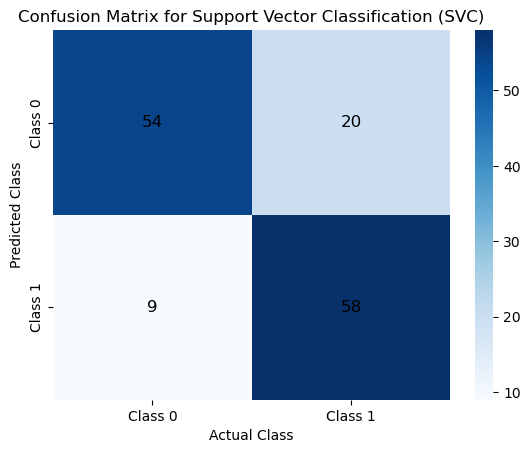

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap object and assign it to 'ax'
ax = sns.heatmap(cm_testing, annot=True, cmap='Blues')

# Set xlabel, ylabel, and title
ax.set_xlabel('Actual Class')
ax.set_ylabel('Predicted Class')
ax.set_title('Confusion Matrix for Support Vector Classification (SVC)')

ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Set font size and color for annotations
plt.setp(ax.texts, fontsize=12, color='black')

# Show plot
plt.show()

In [101]:
# Get the absolute values of the coefficients
coef_abs = abs(model.coef_.ravel())

# Print the feature importance
for i, importance in enumerate(coef_abs):
    print(f'Feature {i}: {importance:.3f}')

Feature 0: 0.003
Feature 1: 0.127
Feature 2: 0.143
Feature 3: 0.146
Feature 4: 1.301
Feature 5: 2.347
Feature 6: 0.296
Feature 7: 0.007
Feature 8: 0.037
Feature 9: 0.262
